# EXAMÉN CIENCIA DE DATOS PARA LA ECONOMÍA: IGNACIO CHANDIA #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importar Datos

In [4]:
df = pd.read_csv('nba_logreg2.csv', sep = ";")
df.head(3)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0


In [5]:
df.shape

(1329, 21)

A continuación se presenta una dataset sobre métricas de rendimientos de jugadores de la NBA durante su carrera, junto con la variable target si la carrera del basquetbolista supera o no los 5 años.

A continuación se detalla las variables que componen este dataset:

| Nombre columnas | Contenido |
|--- | --- |
|Name   |Nombre |
| GP    |Juegos jugados |
| MIN   |Minutos jugados |
| PTS   |Puntos por partido |
| FGM   |Objetivos de campo realizados |
| FGA   |Objetivos de campo intentados |
| FG%   |Porcentaje de puntos de campo |
| 3P Mode   |3 puntos hecho |
| 3PA   |Intentos de 3 puntos |
| 3P%   |3 puntos por ciento |
| FTM   |Tiro libre hecho |
| FTA   |Intentos de lanzamiento libre |
| FT%   |Porcentaje de lanzamiento libre |
| OREB  |Rebotes ofensivos |
| DREB  |Rebotes defensivos |
| REB   |Rebotes |
| AST   |Asistencias |
| STL   |Roba |
| BLK   |Bloques |
| TOV   |Pérdidas de balón |
| TARGET_5Yrs   |Variable predictora (1-Si la duración de la carrera>= 5 años) y (0-si<5) |



## Descripción de los datos

In [6]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


## Primeros registros

In [7]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Tipo de Datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

In [9]:
variablescontinuas = [
    'MIN',
    'PTS',
    'FGM',
    'FGA',
    'FG%',
    '3P Made',
    '3PA',
    '3P%',
    'FTM',
    'FTA',
    'FT%',
    'OREB',
    'DREB',
    'REB',
   'AST',
    'STL',
    'BLK',
    'TOV'
]

df_1 = df[variablescontinuas]

df_1.head()

,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


## Gráfico de Correlación

En el paso anterior, se quitó la columna name, pues no es continua y genera problemas con las visualizaciones, ademas de la variable predecida.

In [10]:
df_1 = df.drop('Name', axis=1)

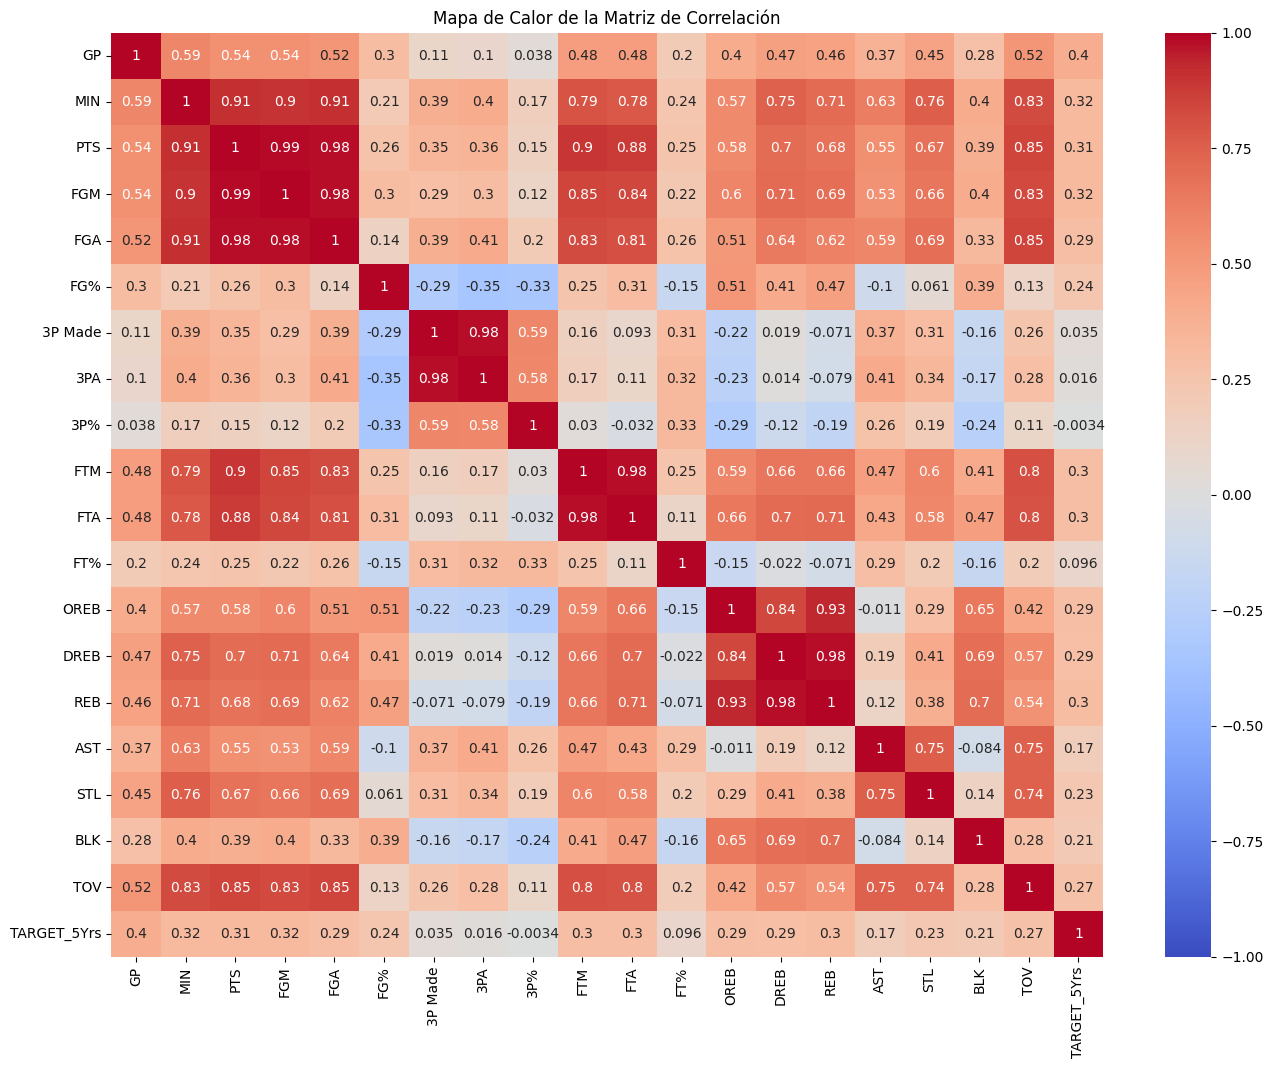

In [11]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

La primera parte del proyecto fue realizada con éxito, donde fueron descritas las variables y se visualizan con el gráfico de correlación, para ver la relación de cada variable.


## Análisis de Componentes Principales

El dataset original cuenta con 21 columnas. Debido a esto, se procede en primer lugar a seleccioanr las columnas numéricas. Posteriormente, se procede a aplicar Analisis de Componentes Principales.

### Supuestos del PCA

1. **Linealidad**: Se asume que las relaciones entre las variables son lineales.
2. **Gran media y varianza**: Los componentes principales se calculan de modo que expliquen la mayor parte posible de la varianza en los datos, aquí tenemos un 72% explicado con dos componentes.
3. **Independencia de las componentes principales**: Las componentes principales son ortogonales entre sí, lo que implica que no están correlacionadas.
4. **Escalado de los datos**: Se recomienda escalar los datos de modo que cada característica tenga una media de 0 y una varianza de 1. Esto asegura que todas las características contribuyan por igual al análisis.

En este análisis, hemos aplicado estos supuestos y asegurado que los datos están estandarizados antes de aplicar el PCA.


In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
# Separar x e y
y = df_1['TARGET_5Yrs']
X = df_1.drop('TARGET_5Yrs', axis=1)

In [19]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se procedio a normalizar los datos, para aplicar el PCA

In [20]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train_scaled)
principalComponents_test = pca.transform(X_test_scaled)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

In [22]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')
print(f'Total Explained variance : {explained_variance.sum()}')

Explained variance ratio: [0.50185468 0.2082467  0.06254087]
Total Explained variance : 0.7726422424594022


Se eligieron 3 componentes, pues explican el 77% de la varianza de los datos

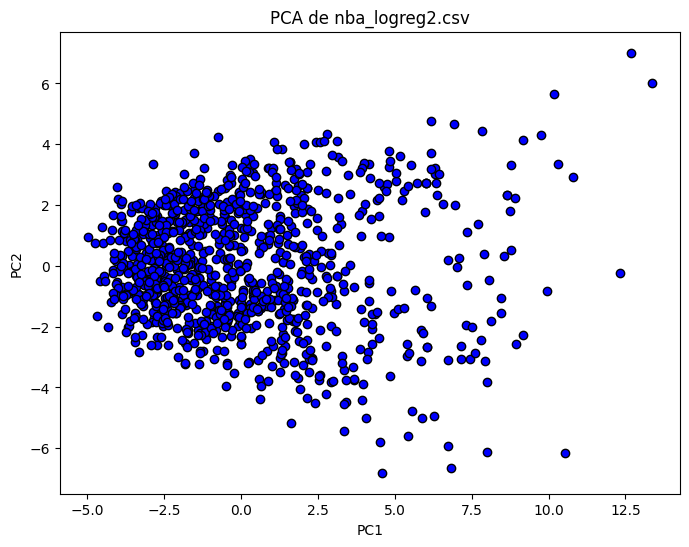

In [23]:
# Visualización de los componentes principales
plt.figure(figsize=(8,6))
plt.scatter(principalDf['PC1'], principalDf['PC2'], c='blue', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA de nba_logreg2.csv')
plt.show()

## Algoritmo LazyClassifier

LazyClassifier es una biblioteca que permite entrenar múltiples modelos de clasificación de manera rápida y sencilla. Proporciona una comparación rápida de varios algoritmos sin necesidad de escribir mucho código. Esto es útil para identificar qué modelos de clasificación funcionan mejor con un conjunto de datos específico.

In [ ]:
#!pip install lazypredict

In [25]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


In [26]:
models, predictions = LazyClassifier().fit(principalComponents, principalComponents_test, y_train, y_test)


 97%|█████████▋| 28/29 [00:09<00:00,  2.24it/s]

[LightGBM] [Info] Number of positive: 650, number of negative: 413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.611477 -> initscore=0.453525
[LightGBM] [Info] Start training from score 0.453525


100%|██████████| 29/29 [00:09<00:00,  2.91it/s]


LazyClassifier nos enterga 27 modelos diferentes. Dentro de lo que vamos a ver encontramos el modelo y la prediccion de este mismo. Podemos ver la precision del modelo.

In [29]:
models[:15]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.66,0.70,0.70,0.67,0.22
BaggingClassifier,0.68,0.69,0.69,0.69,0.24
SGDClassifier,0.65,0.68,0.68,0.66,0.12
AdaBoostClassifier,0.71,0.68,0.68,0.71,0.66
GaussianNB,0.64,0.68,0.68,0.65,0.07
QuadraticDiscriminantAnalysis,0.63,0.67,0.67,0.64,0.14
LinearDiscriminantAnalysis,0.71,0.67,0.67,0.71,0.14
LogisticRegression,0.70,0.67,0.67,0.70,0.09
LinearSVC,0.70,0.67,0.67,0.70,0.20


In [ ]:
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)

**Mejores Algoritmos de Clasificación**

- Logistic Regression: Utilizado para modelos de clasificación binaria. Es un método simple pero efectivo para problemas lineales.

- Random Forest: Un conjunto de árboles de decisión entrenados en diferentes subconjuntos del conjunto de datos. Es robusto y reduce el riesgo de overfitting.

- Gradient Boosting: Una técnica de machine learning para clasificación y regresión que construye un modelo de predicción fuerte a partir de un conjunto de modelos débiles.

- Support Vector Machines (SVM): Un algoritmo que encuentra el hiperplano que mejor separa las clases en el espacio de características.

- K-Nearest Neighbors (KNN): Un método simple que clasifica una muestra en función de la mayoría de los votos de sus k vecinos más cercanos.

Estos algoritmos fueron explicados y utilizados durante las clases, y cada uno tiene sus ventajas y desventajas dependiendo del tipo de datos y del problema específico a tratar.

Como vemos, todos los modelos son similares en cuanto a la precisión, pero el mejor modelo según las métricas generales (Accuracy, F1 Score y ROC AUC) parece ser RidgeClassifier y RidgeClassifierCV, pues ambos tienen:

Accuracy: 0.70 (el más alta) F1 Score: 0.70 (el más alta entre los modelos de alta precisión)

## Modelo Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV a los datos
grid_search.fit(principalComponents, y_train)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [35]:
# Entrenar el modelo con los mejores hiperparámetros
best_rf = grid_search.best_estimator_
best_rf.fit(principalComponents, y_train)

# Realizar predicciones
y_pred = best_rf.predict(principalComponents_test)

In [46]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(principalComponents_test)[:, 1])
report = classification_report(y_test, y_pred)

print("Accuracy:", round(accuracy,2))
print("F1 Score:", round(f1,2))
print("ROC AUC:", round(roc_auc,2))
print("\nClassification Report:\n", report)

Accuracy: 0.7
F1 Score: 0.7
ROC AUC: 0.76

Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.59      0.57        90
         1.0       0.78      0.75      0.77       176

    accuracy                           0.70       266
   macro avg       0.66      0.67      0.67       266
weighted avg       0.70      0.70      0.70       266



El modelo tiene una precisión general de 0.70, lo que significa que el 70% de las predicciones son correctas. El F1 score también es 0.70, lo que indica un buen balance entre la precisión y recall. El ROC AUC de 0.76 o 76% sugiere que el modelo tiene una buena capacidad para distinguir entre las clases.

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


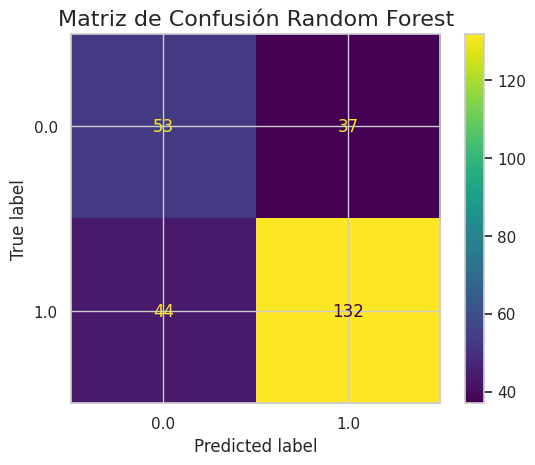

In [47]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=df['TARGET_5Yrs'].unique()).plot()
plt.title("Matriz de Confusión Random Forest", fontsize=16)
plt.show()

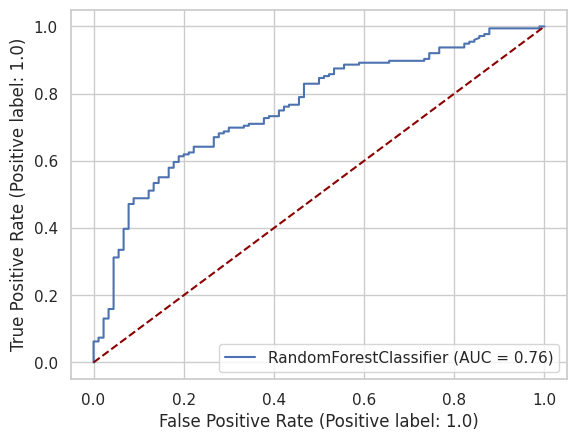

In [48]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_rf , principalComponents_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()